   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


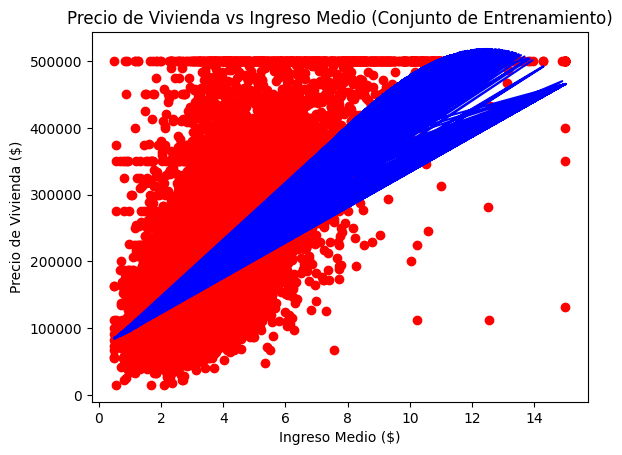

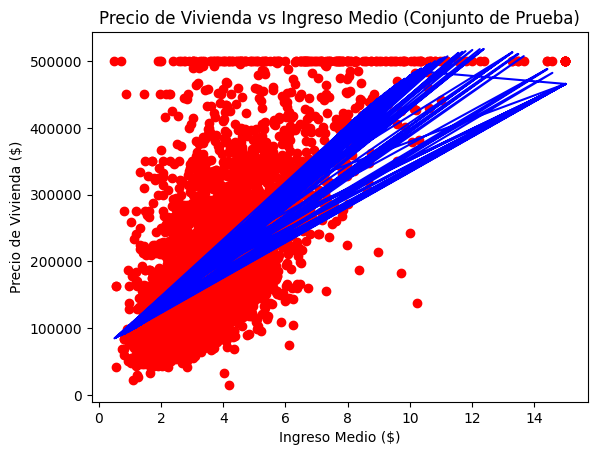

In [1]:
## Importar bibliotecas
import numpy as np  # Para operaciones matemáticas
import matplotlib.pyplot as plt  # Para visualización de datos
import pandas as pd  # Para manipulación de datos
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento/prueba
from sklearn.preprocessing import PolynomialFeatures  # Para generar características polinómicas
from sklearn.linear_model import LinearRegression  # Para el modelo de regresión lineal
from sklearn.preprocessing import StandardScaler  # Para escalado de características

# Cargar el conjunto de datos
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
dataset = pd.read_csv(url)

# Ver las primeras filas para entender el conjunto de datos
print(dataset.head())

# Usaremos 'median_income' como la variable independiente (X) y 'median_house_value' como la variable dependiente (y)
X = dataset[['median_income']].values  # Variable independiente (median_income)
y = dataset['median_house_value'].values  # Variable dependiente (median_house_value)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Escalado de características 
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
y_train = sc_y.fit_transform(y_train.reshape(-1, 1)).flatten()  # Redimensionado para escalado
y_test = sc_y.transform(y_test.reshape(-1, 1)).flatten()

# Transformación polinómica de las características (grado 3)
poly_reg = PolynomialFeatures(degree=3)
X_poly_train = poly_reg.fit_transform(X_train)

# Ajustar la regresión polinómica al conjunto de entrenamiento
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly_train, y_train)

# Predecir el resultado para el conjunto de prueba
X_poly_test = poly_reg.transform(X_test)
y_pred = poly_regressor.predict(X_poly_test)

# Deshacer el escalado de las predicciones
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()

# Visualizar los resultados para el conjunto de entrenamiento
plt.scatter(sc_X.inverse_transform(X_train), sc_y.inverse_transform(y_train.reshape(-1, 1)), color="red")
plt.plot(sc_X.inverse_transform(X_train), sc_y.inverse_transform(poly_regressor.predict(X_poly_train).reshape(-1, 1)), color="blue")
plt.title("Precio de Vivienda vs Ingreso Medio (Conjunto de Entrenamiento)")
plt.xlabel("Ingreso Medio ($)")
plt.ylabel("Precio de Vivienda ($)")
plt.show()

# Visualizar los resultados para el conjunto de prueba
plt.scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test.reshape(-1, 1)), color="red")
plt.plot(sc_X.inverse_transform(X_test), sc_y.inverse_transform(poly_regressor.predict(X_poly_test).reshape(-1, 1)), color="blue")
plt.title("Precio de Vivienda vs Ingreso Medio (Conjunto de Prueba)")
plt.xlabel("Ingreso Medio ($)")
plt.ylabel("Precio de Vivienda ($)")
plt.show()
